In [1]:
import pandas as pd

In [2]:
df_1 = pd.read_csv("extra_datasets/EMP01.20211107165938.csv")

In [4]:
df_2 = pd.read_csv("extra_datasets/EMP02.20211107170021.csv")

## Dataset EMP01

In [5]:
df_1.head()

STATISTIC                Statistic  TLIST(A1)  Year C03430V04137  \
0  EMP01C01   Maternity benefit rate       2016  2016            A   
1  EMP01C01   Maternity benefit rate       2016  2016            F   
2  EMP01C01   Maternity benefit rate       2016  2016            G   
3  EMP01C01   Maternity benefit rate       2016  2016            H   
4  EMP01C01   Maternity benefit rate       2016  2016            I   

                           Nace Rev 2 Activity                    UNIT  VALUE  
0        Agriculture, Forestry and Fishing (A)  Rate per 100 Employees    4.9  
1                             Construction (F)  Rate per 100 Employees    5.8  
2               Wholesale and Retail Trade (G)  Rate per 100 Employees    4.6  
3               Transportation and Storage (H)  Rate per 100 Employees    6.2  
4  Accommodation & Food Service Activities (I)  Rate per 100 Employees    3.1

In [6]:
df_1["Statistic"].unique()

array([' Maternity benefit rate', 'Paternity benefit rate'], dtype=object)

In [7]:
df_1["STATISTIC"].unique()

array(['EMP01C01', 'EMP01C02'], dtype=object)

In [8]:
df_1["Year"].unique()

array([2016, 2017, 2018, 2019])

In [16]:
for element in list(df_1["Nace Rev 2 Activity"].unique()):
    print(element)

Agriculture, Forestry and Fishing (A)
Construction (F)
Wholesale and Retail Trade (G)
Transportation and Storage (H)
Accommodation & Food Service Activities (I)
Information and communication (J)
Professional, Scientific and Technical Activities (M)
Administrative and Support Service Activities (N)
Public Administration and Defence (O)
Education (P)
Human Health and Social Work Activities (Q)
Industry (B to E)
Financial & Real Estate (K,L)
Other NACE Activities (R-U)


In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STATISTIC            112 non-null    object 
 1   Statistic            112 non-null    object 
 2   TLIST(A1)            112 non-null    int64  
 3   Year                 112 non-null    int64  
 4   C03430V04137         112 non-null    object 
 5   Nace Rev 2 Activity  112 non-null    object 
 6   UNIT                 112 non-null    object 
 7   VALUE                112 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 7.1+ KB


In [14]:
"""here we're looking for maternity benefit observations only.
We'll group them by year. 
Then find the sum of the VALUE observations for each year"""

df_1[df_1["Statistic"] == " Maternity benefit rate"].groupby("Year")["VALUE"].sum()

Year
2016    83.3
2017    78.9
2018    77.4
2019    74.8
Name: VALUE, dtype: float64

In [15]:
# now let's do the same for paternity benefit
df_1[df_1["Statistic"] == "Paternity benefit rate"].groupby("Year")["VALUE"].sum()

Year
2016     8.5
2017    45.1
2018    42.1
2019    44.0
Name: VALUE, dtype: float64

In [17]:
df_3 = pd.read_csv("extra_datasets/QLF34.20211123T171129.csv")

In [18]:
df_3.head()

Statistic Quarter        Nationality  \
0  Persons aged 15 years and over in Employment  1998Q1  All nationalities   
1  Persons aged 15 years and over in Employment  1998Q1  All nationalities   
2  Persons aged 15 years and over in Employment  1998Q1  All nationalities   
3  Persons aged 15 years and over in Employment  1998Q1  All nationalities   
4  Persons aged 15 years and over in Employment  1998Q1  All nationalities   

                          NACE Rev 2 Economic Sector      UNIT   VALUE  
0                          All NACE economic sectors  Thousand  1550.3  
1              Agriculture, forestry and fishing (A)  Thousand   135.6  
2                                   Construction (F)  Thousand   103.7  
3  Wholesale and retail trade; repair of motor ve...  Thousand   219.5  
4                     Transportation and storage (H)  Thousand    65.6

In [19]:
df_3.tail()

Statistic Quarter  \
10523  Persons aged 15 years and over in Employment  2021Q2   
10524  Persons aged 15 years and over in Employment  2021Q2   
10525  Persons aged 15 years and over in Employment  2021Q2   
10526  Persons aged 15 years and over in Employment  2021Q2   
10527  Persons aged 15 years and over in Employment  2021Q2   

                   Nationality  \
10523  Other nationalities (7)   
10524  Other nationalities (7)   
10525  Other nationalities (7)   
10526  Other nationalities (7)   
10527  Other nationalities (7)   

                              NACE Rev 2 Economic Sector      UNIT  VALUE  
10523        Human health and social work activities (Q)  Thousand   23.9  
10524                                  Industry (B to E)  Thousand   14.3  
10525  Financial, insurance and real estate activitie...  Thousand    NaN  
10526                     Other NACE activities (R to U)  Thousand    NaN  
10527                                         Not stated  Thousand    NaN

In [20]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10528 entries, 0 to 10527
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Statistic                   10528 non-null  object 
 1   Quarter                     10528 non-null  object 
 2   Nationality                 10528 non-null  object 
 3   NACE Rev 2 Economic Sector  10528 non-null  object 
 4   UNIT                        10528 non-null  object 
 5   VALUE                       6942 non-null   float64
dtypes: float64(1), object(5)
memory usage: 493.6+ KB


In [21]:
import seaborn as sns

In [24]:
import matplotlib.pyplot as plt

In [33]:
# let's try to find the distribution of these nan values
nan_index = [index for index, row in df_3.iterrows() if row.isnull().any()]

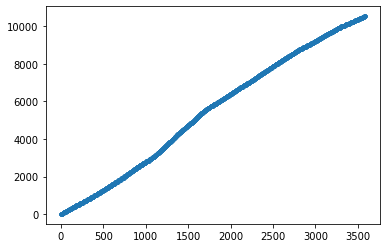

In [38]:
plt.plot(nan_index, '.')

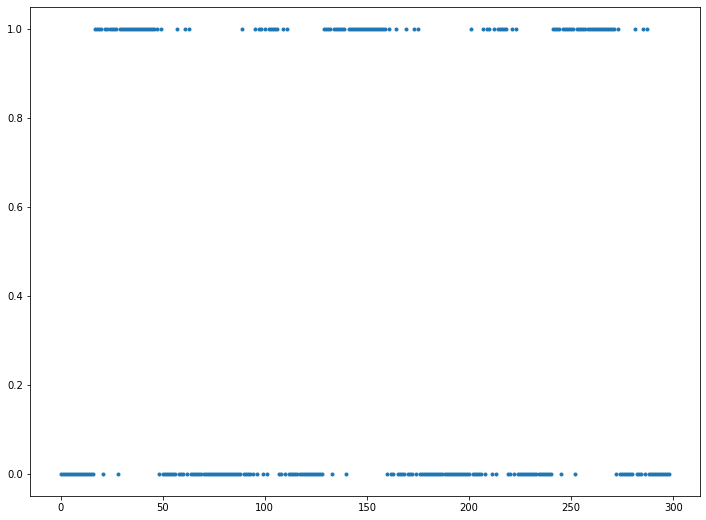

In [51]:
x = range(max(nan_index))
y = []

for i in x:
    if i in nan_index:
        y.append(1)
    else:
        y.append(0)

plt.figure(figsize=(12,9))
plt.plot(x[0:299], y[0:299], '.')